In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

#配置中文字体和修改字体大小
matplotlib.rcParams['font.family'] = 'SimHei'
matplotlib.rcParams['font.size'] = 20

In [42]:
df = pd.read_csv('top250_movie.csv',encoding = 'utf-8')

In [43]:
df

,电影排名,电影名称,电影年份,国家,电影类型,导演,经典影评,评论数,评分,电影网址
0,1,肖申克的救赎,1994,美国,犯罪 剧情,弗兰克·德拉邦特 Frank Darabont,希望让人自由。,3033983人评价,9.7,https://movie.douban.com/subject/1292052/
1,2,霸王别姬,1993,中国大陆 中国香港,剧情 爱情 同性,陈凯歌 Kaige Chen,风华绝代。,2242587人评价,9.6,https://movie.douban.com/subject/1291546/
2,3,阿甘正传,1994,美国,剧情 爱情,罗伯特·泽米吉斯 Robert Zemeckis,一部美国近现代史。,2260671人评价,9.5,https://movie.douban.com/subject/1292720/
3,4,泰坦尼克号,1997,美国 墨西哥,剧情 爱情 灾难,詹姆斯·卡梅隆 James Cameron,失去的才是永恒的。,2299851人评价,9.5,https://movie.douban.com/subject/1292722/
4,5,千与千寻,2001,日本,剧情 动画 奇幻,宫崎骏 Hayao Miyazaki,最好的宫崎骏，最好的久石让。,2348828人评价,9.4,https://movie.douban.com/subject/1291561/
...,...,...,...,...,...,...,...,...,...,...
245,246,谍影重重,2002,美国 德国 捷克,动作 悬疑 惊悚,道格·里曼 Doug Liman,哗啦啦啦啦，天在下雨，哗啦啦啦啦，云在哭泣……找自己。,450225人评价,8.6,https://movie.douban.com/subject/1304102/
246,247,阿飞正传,1990,中国香港,犯罪 剧情 爱情,王家卫 Kar Wai Wong,王家卫是一种风格，张国荣是一个代表。,535916人评价,8.5,https://movie.douban.com/subject/1305690/
247,248,朗读者,2008,美国 德国,剧情 爱情,史蒂芬·戴德利 Stephen Daldry,当爱情跨越年龄的界限，它似乎能变得更久远一点，成为一种责任，一种水到渠成的相濡以沫。,467903人评价,8.6,https://movie.douban.com/subject/2213597/
248,249,隐藏人物,2016,美国,剧情 传记 历史,特奥多尔·梅尔菲 Theodore Melfi,NaN,234958人评价,8.9,https://movie.douban.com/subject/26615208/


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   电影排名    250 non-null    int64  
 1   电影名称    250 non-null    object 
 2   电影年份    250 non-null    object 
 3   国家      250 non-null    object 
 4   电影类型    250 non-null    object 
 5   导演      250 non-null    object 
 6   经典影评    229 non-null    object 
 7   评论数     250 non-null    object 
 8   评分      250 non-null    float64
 9   电影网址    250 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 19.7+ KB


In [45]:
len(df.电影名称.unique())#没有重复的电影

250

In [46]:
df.国家.head(20)#电影有多个国家进行参与

0            美国
1     中国大陆 中国香港
2            美国
3        美国 墨西哥
4            日本
5         法国 美国
6           意大利
7     美国 英国 加拿大
8         美国 英国
9            美国
10           美国
11        美国 英国
12          意大利
13           印度
14     法国 瑞士 德国
15           美国
16           美国
17         中国香港
18           美国
19    中国香港 中国大陆
Name: 国家, dtype: object

In [47]:
#处理国家的信息
country = df['国家'].str.split(' ').apply(pd.Series)
country

,0,1,2,3,4,5
0,美国,NaN,NaN,NaN,NaN,NaN
1,中国大陆,中国香港,NaN,NaN,NaN,NaN
2,美国,NaN,NaN,NaN,NaN,NaN
3,美国,墨西哥,NaN,NaN,NaN,NaN
4,日本,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
245,美国,德国,捷克,NaN,NaN,NaN
246,中国香港,NaN,NaN,NaN,NaN,NaN
247,美国,德国,NaN,NaN,NaN,NaN
248,美国,NaN,NaN,NaN,NaN,NaN


In [48]:
all_country_counts = country.apply(pd.value_counts).fillna(0)
all_country_counts.columns = ['area1','area2','area3','area4','area5','area6']
all_country_counts['area1'] = all_country_counts['area1'].astype(int)
all_country_counts['area2'] = all_country_counts['area2'].astype(int)
all_country_counts['area3'] = all_country_counts['area3'].astype(int)
all_country_counts['area4'] = all_country_counts['area4'].astype(int)
all_country_counts['area5'] = all_country_counts['area5'].astype(int)
all_country_counts['area6'] = all_country_counts['area6'].astype(int)
all_country_counts.head(5)

C:\Users\Wind\AppData\Local\Temp\ipykernel_21640\433149081.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  all_country_counts = country.apply(pd.value_counts).fillna(0)
C:\Users\Wind\AppData\Local\Temp\ipykernel_21640\433149081.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  all_country_counts = country.apply(pd.value_counts).fillna(0)
C:\Users\Wind\AppData\Local\Temp\ipykernel_21640\433149081.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  all_country_counts = country.apply(pd.value_counts).fillna(0)
C:\Users\Wind\AppData\Local\Temp\ipykernel_21640\433149081.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  all_country_co

,area1,area2,area3,area4,area5,area6
中国台湾,6,2,1,0,0,0
中国大陆,18,8,1,0,0,0
中国香港,20,10,0,1,0,0
丹麦,1,0,0,0,0,0
伊朗,1,0,0,0,0,0


In [49]:
all_country_counts['all_counts'] = all_country_counts['area1'] + all_country_counts['area2'] + all_country_counts['area3'] + all_country_counts['area4'] + all_country_counts['area5'] + all_country_counts['area6']
all_country_counts.sort_values(['all_counts'],inplace=True,ascending=False)#nplace默认为False,如果该值为False，那么原来的pd顺序没变，只是返回的是新的pd。
#查看上榜前五的国家
all_country_counts.head(5)

,area1,area2,area3,area4,area5,area6,all_counts
美国,114,24,2,3,1,0,144
英国,20,13,4,1,0,1,39
日本,33,2,0,0,0,0,35
中国香港,20,10,0,1,0,0,31
中国大陆,18,8,1,0,0,0,27


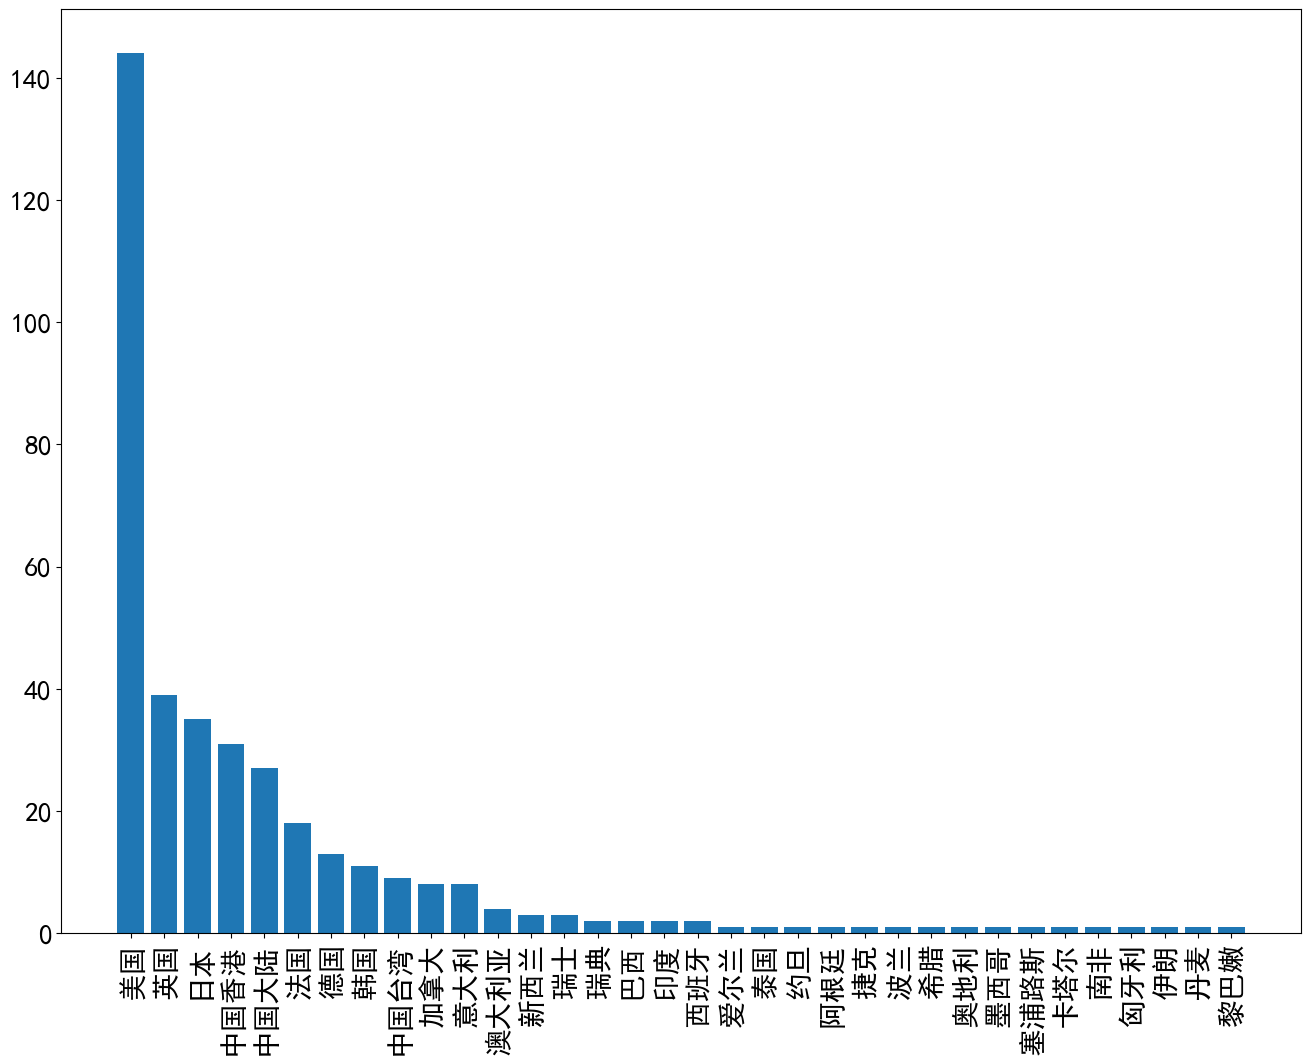

In [66]:
#绘制国家排行可视化图像
country_rank = pd.DataFrame({'counts':all_country_counts['all_counts']})
country_rank.plot(kind='bar',figsize=(16,12))
plt.savefig('国家排行柱状图.png')

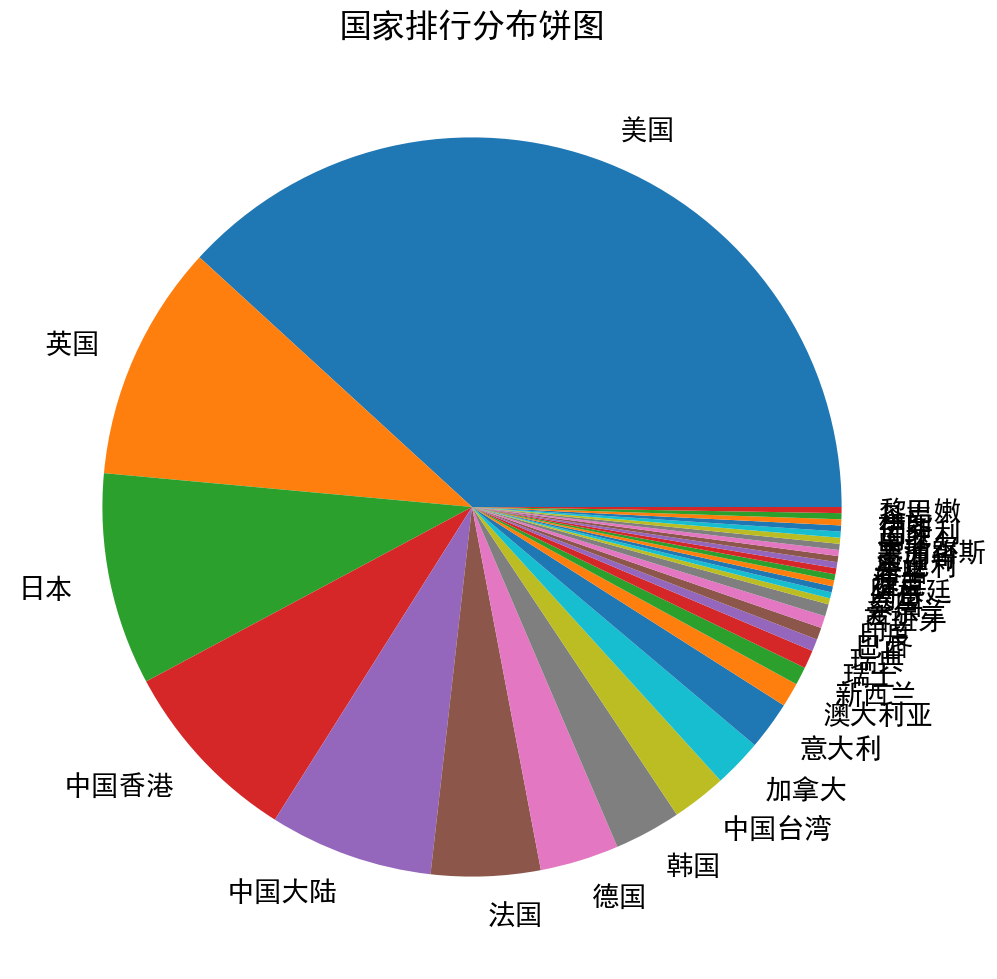

In [51]:
plt.figure(figsize=(12,12))
plt.pie(country_rank['counts'],labels=country_rank.index)
plt.title("国家排行分布饼图")
plt.savefig('国家排行饼图.png')
plt.show()

In [52]:
#处理电影类型
all_type = df['电影类型'].str.split(' ').apply(pd.Series)
all_type.head(10)

,0,1,2,3,4
0,犯罪,剧情,NaN,NaN,NaN
1,剧情,爱情,同性,NaN,NaN
2,剧情,爱情,NaN,NaN,NaN
3,剧情,爱情,灾难,NaN,NaN
4,剧情,动画,奇幻,NaN,NaN
5,剧情,动作,犯罪,NaN,NaN
6,剧情,喜剧,爱情,战争,NaN
7,剧情,科幻,冒险,NaN,NaN
8,剧情,科幻,悬疑,冒险,NaN
9,剧情,科幻,NaN,NaN,NaN


In [53]:
all_type = all_type.apply(pd.value_counts).fillna('0')
all_type.columns = ['tpye1','type2','type3','type4','type5']
all_type['tpye1'] = all_type['tpye1'].astype(int)
all_type['type2'] = all_type['type2'].astype(int)
all_type['type3'] = all_type['type3'].astype(int)
all_type['type4'] = all_type['type4'].astype(int)
all_type['type5'] = all_type['type5'].astype(int)

C:\Users\Wind\AppData\Local\Temp\ipykernel_21640\784782237.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  all_type = all_type.apply(pd.value_counts).fillna('0')
C:\Users\Wind\AppData\Local\Temp\ipykernel_21640\784782237.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  all_type = all_type.apply(pd.value_counts).fillna('0')
C:\Users\Wind\AppData\Local\Temp\ipykernel_21640\784782237.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  all_type = all_type.apply(pd.value_counts).fillna('0')
C:\Users\Wind\AppData\Local\Temp\ipykernel_21640\784782237.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  all_type = all_type.apply(pd.value_

In [54]:
all_type['all_counts'] = all_type['tpye1']+all_type['type2']+all_type['type3']+all_type['type4']+all_type['type5']

all_type.sort_values(['all_counts'],inplace=True,ascending=False)
#查看电影类型前十的排行
all_type.head(10)

,tpye1,type2,type3,type4,type5,all_counts
剧情,168,15,4,0,0,187
爱情,2,36,19,0,0,57
喜剧,23,29,0,0,0,52
冒险,2,10,25,11,2,50
犯罪,7,25,7,3,0,42
奇幻,6,14,18,3,0,41
动画,13,14,9,1,0,37
惊悚,0,6,16,7,4,33
动作,17,12,2,0,0,31
悬疑,3,14,10,3,0,30


In [55]:
#处理上榜次数的导演
direcotor = df['导演'].value_counts()#导演只有一列一个值 所以可以直接用.value_counts返回一个series序列
direcotor.head()

导演
 宫崎骏 Hayao Miyazaki            8
 史蒂文·斯皮尔伯格 Steven Spielberg    6
 克里斯托弗·诺兰 Christopher Nolan    6
 李安 Ang Lee                    5
 王家卫 Kar Wai Wong              5
Name: count, dtype: int64

In [56]:
#series 转dataframe 可以使用字典的方式
mydirector = pd.DataFrame({'name':direcotor.index,'counts':direcotor.values})
mydirector.sort_values(['counts'],inplace=True,ascending=False)
#查看上榜前十的导演
mydirector.head(10)


,name,counts
0,宫崎骏 Hayao Miyazaki,8
2,克里斯托弗·诺兰 Christopher Nolan,6
1,史蒂文·斯皮尔伯格 Steven Spielberg,6
3,李安 Ang Lee,5
4,王家卫 Kar Wai Wong,5
5,大卫·芬奇 David Fincher,4
6,今敏 Satoshi Kon,4
7,是枝裕和 Hirokazu Koreeda,4
12,弗朗西斯·福特·科波拉 Francis Ford Coppola,3
16,理查德·林克莱特 Richard Linklater,3


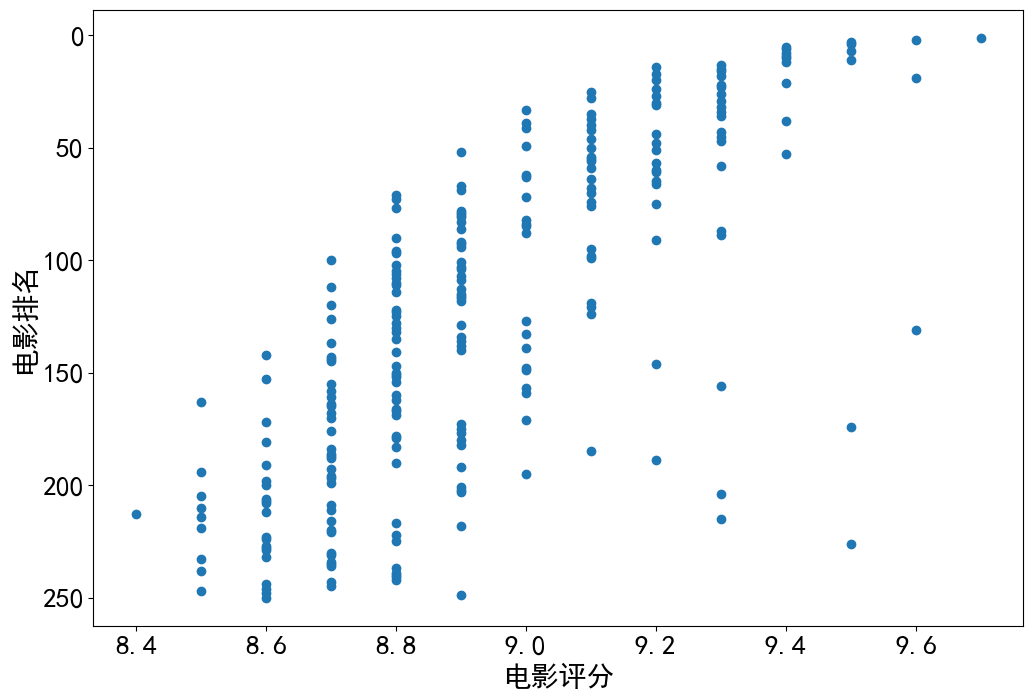

In [59]:
#查看排名与评分的关系
plt.figure(figsize=(12,8))
plt.scatter(df['评分'],df['电影排名'])
plt.xlabel('电影评分')
plt.ylabel('电影排名')
#为符合观看习惯将y轴倒叙
plt.gca().invert_yaxis()
plt.savefig('排名与评分.png')

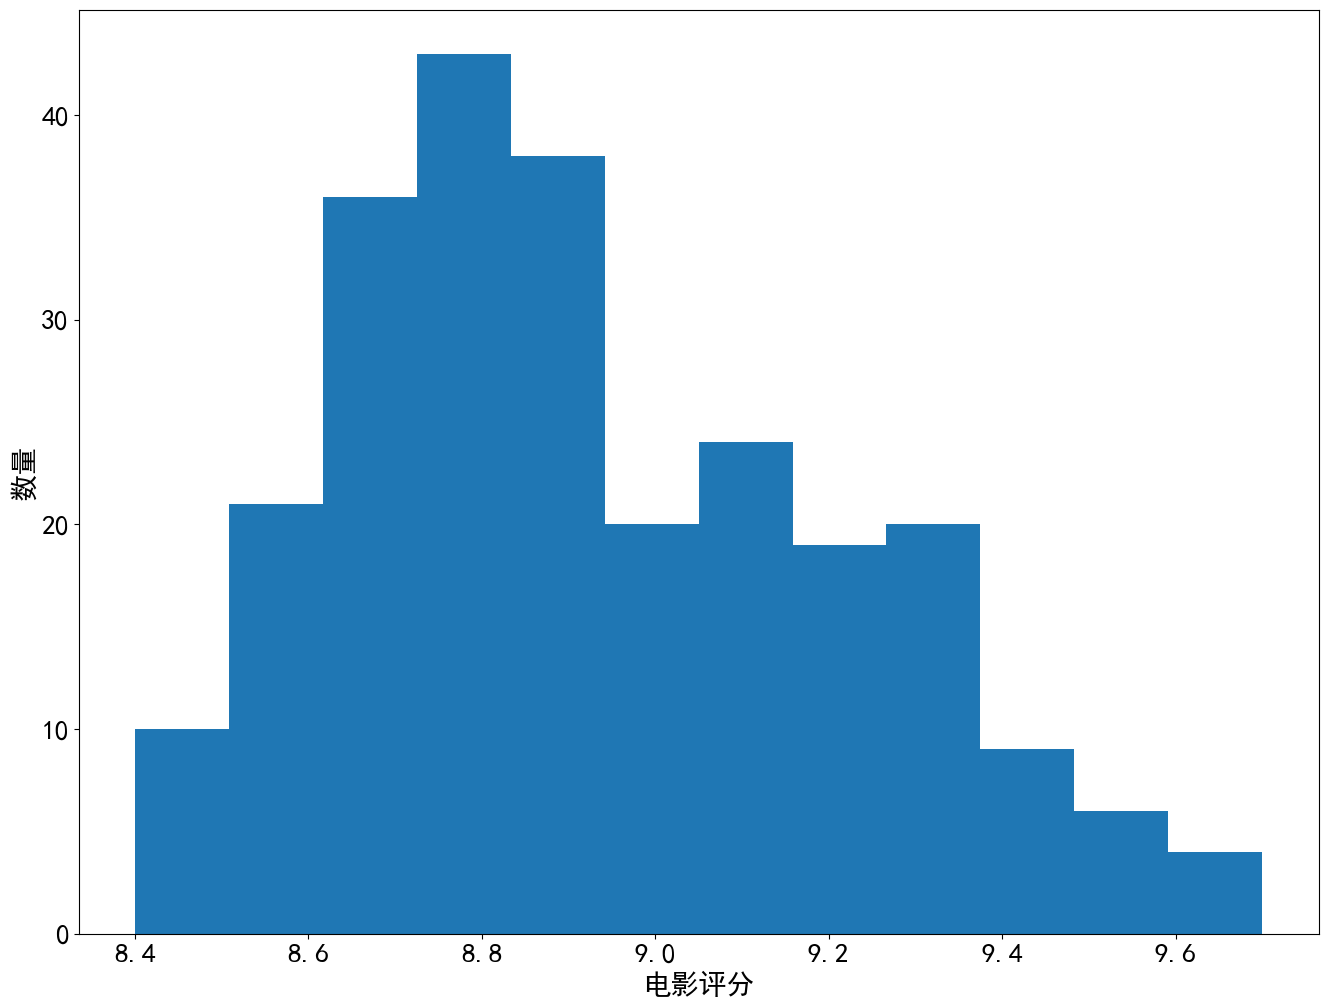

In [69]:
#查看评分的分布
plt.figure(figsize=(16,12))
plt.hist(df['评分'],bins=12)
plt.xlabel('电影评分')
plt.ylabel('数量')
plt.savefig('评分分布柱状图.png')